In [2]:
#Import libraries we will use in the analysis
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import inspect
from tqdm import tqdm

In [3]:
#Set starting and ending date for dowloading data from Yahoo Finance
start = dt.datetime(2000, 1, 1).strftime('%Y-%m-%d')
end = dt.datetime.now().strftime('%Y-%m-%d')
print(start, end)

2000-01-01 2024-04-12


In [4]:
#Get the list of tickers from the S&P 500
from fetch_sp500 import tickers_sp500
tickers = tickers_sp500()
tickers = tickers[:500]

In [ ]:
#Fetch and save the prices for the tickers
from fetch_sp500 import fetch_and_save_prices
prices = fetch_and_save_prices(tickers)
prices.head()

In [3]:
#load the data from the saved csv file
prices = pd.read_csv(f'stock_history.csv', header=[0, 1], index_col=0)
prices.head()

Adj Close                                              \
                             A AAL      AAPL ABBV ABNB       ABT      ACGL   
Date                                                                         
2000-01-03 00:00:00  43.613014 NaN  0.846127  NaN  NaN  9.037446  1.277778   
2000-01-04 00:00:00  40.281467 NaN  0.774790  NaN  NaN  8.779240  1.270833   
2000-01-05 00:00:00  37.782784 NaN  0.786128  NaN  NaN  8.763096  1.388889   
2000-01-06 00:00:00  36.344177 NaN  0.718097  NaN  NaN  9.069727  1.375000   
2000-01-07 00:00:00  39.372864 NaN  0.752113  NaN  NaN  9.166554  1.451389   

                                               ...  Volume                    \
                    ACN       ADBE        ADI  ...     WST WTW       WY WYNN   
Date                                           ...                             
2000-01-03 00:00:00 NaN  16.274672  28.438293  ...   29200 NaN   973700  NaN   
2000-01-04 00:00:00 NaN  14.909401  26.999628  ...  555600 NaN  1201700  NaN   
2000-01-05 00:00:00 NaN  15.204174  27.393772  ...  222400 NaN  1184600  NaN   
2000-01-06 00:00:00 NaN  15.328290  26.644878  ...   97600 NaN  1307700  NaN   
2000-01-07 00:00:00 NaN  16.072981  27.393772  ...   86400 NaN  1728000  NaN   

                                                                  
                         XEL       XOM XYL      YUM ZBH     ZBRA  
Date                                                              
2000-01-03 00:00:00  2738600  13458200 NaN  3033493 NaN  1055700  
2000-01-04 00:00:00   425200  14510800 NaN  3315031 NaN   522450  
2000-01-05 00:00:00   500200  17485000 NaN  4642602 NaN   612225  
2000-01-06 00:00:00   344100  19461600 NaN  3947658 NaN   263925  
2000-01-07 00:00:00   469500  16603800 NaN  6063647 NaN   333900  

[5 rows x 3000 columns]

In [4]:
## get AAPL data
ticker = 'AAPL'
comp_price = prices.xs(ticker, axis=1, level=1, drop_level=True)
comp_price.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2000-01-03 00:00:00,0.846127,0.999442,1.004464,0.907924,0.936384,535796800
2000-01-04 00:00:00,0.774790,0.915179,0.987723,0.903460,0.966518,512377600
2000-01-05 00:00:00,0.786128,0.928571,0.987165,0.919643,0.926339,778321600
2000-01-06 00:00:00,0.718097,0.848214,0.955357,0.848214,0.947545,767972800
2000-01-07 00:00:00,0.752113,0.888393,0.901786,0.852679,0.861607,460734400


In [5]:
## get the data of specific period
period_price = comp_price.loc['2020-01-01':'2021-01-01']
period_price.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02 00:00:00,73.059425,75.087502,75.150002,73.797501,74.059998,135480400
2020-01-03 00:00:00,72.349121,74.357498,75.144997,74.125000,74.287498,146322800
2020-01-06 00:00:00,72.925629,74.949997,74.989998,73.187500,73.447502,118387200
2020-01-07 00:00:00,72.582672,74.597504,75.224998,74.370003,74.959999,108872000
2020-01-08 00:00:00,73.750252,75.797501,76.110001,74.290001,74.290001,132079200


In [6]:
period_price_oc = period_price[['Open', 'Close']]
period_price_oc.head()

,Open,Close
Date,,
2020-01-02 00:00:00,74.059998,75.087502
2020-01-03 00:00:00,74.287498,74.357498
2020-01-06 00:00:00,73.447502,74.949997
2020-01-07 00:00:00,74.959999,74.597504
2020-01-08 00:00:00,74.290001,75.797501


In [7]:
period_price_oc.columns.name = None
period_price_oc.head()

,Open,Close
Date,,
2020-01-02 00:00:00,74.059998,75.087502
2020-01-03 00:00:00,74.287498,74.357498
2020-01-06 00:00:00,73.447502,74.949997
2020-01-07 00:00:00,74.959999,74.597504
2020-01-08 00:00:00,74.290001,75.797501


In [8]:
period_price_oc.index.name = None
period_price_oc.head()

,Open,Close
2020-01-02 00:00:00,74.059998,75.087502
2020-01-03 00:00:00,74.287498,74.357498
2020-01-06 00:00:00,73.447502,74.949997
2020-01-07 00:00:00,74.959999,74.597504
2020-01-08 00:00:00,74.290001,75.797501


In [9]:
period_price_oc.index.name = 'Date'
period_price_oc.head()

,Open,Close
Date,,
2020-01-02 00:00:00,74.059998,75.087502
2020-01-03 00:00:00,74.287498,74.357498
2020-01-06 00:00:00,73.447502,74.949997
2020-01-07 00:00:00,74.959999,74.597504
2020-01-08 00:00:00,74.290001,75.797501


In [10]:
period_price_oc.reset_index(inplace=True)
period_price_oc.head()

,Date,Open,Close
0,2020-01-02 00:00:00,74.059998,75.087502
1,2020-01-03 00:00:00,74.287498,74.357498
2,2020-01-06 00:00:00,73.447502,74.949997
3,2020-01-07 00:00:00,74.959999,74.597504
4,2020-01-08 00:00:00,74.290001,75.797501


In [11]:
period_price_oc.set_index('Date', inplace=True)
period_price_oc.head()

,Open,Close
Date,,
2020-01-02 00:00:00,74.059998,75.087502
2020-01-03 00:00:00,74.287498,74.357498
2020-01-06 00:00:00,73.447502,74.949997
2020-01-07 00:00:00,74.959999,74.597504
2020-01-08 00:00:00,74.290001,75.797501


In [12]:
period_price_oc.reset_index(inplace=True)
period_price_oc.head()

,Date,Open,Close
0,2020-01-02 00:00:00,74.059998,75.087502
1,2020-01-03 00:00:00,74.287498,74.357498
2,2020-01-06 00:00:00,73.447502,74.949997
3,2020-01-07 00:00:00,74.959999,74.597504
4,2020-01-08 00:00:00,74.290001,75.797501


In [13]:
s = period_price_oc.to_string(header=True, index=False)
print(s)

               Date       Open      Close
2020-01-02 00:00:00  74.059998  75.087502
2020-01-03 00:00:00  74.287498  74.357498
2020-01-06 00:00:00  73.447502  74.949997
2020-01-07 00:00:00  74.959999  74.597504
2020-01-08 00:00:00  74.290001  75.797501
2020-01-09 00:00:00  76.809998  77.407501
2020-01-10 00:00:00  77.650002  77.582497
2020-01-13 00:00:00  77.910004  79.239998
2020-01-14 00:00:00  79.175003  78.169998
2020-01-15 00:00:00  77.962502  77.834999
2020-01-16 00:00:00  78.397499  78.809998
2020-01-17 00:00:00  79.067497  79.682503
2020-01-21 00:00:00  79.297501  79.142502
2020-01-22 00:00:00  79.644997  79.425003
2020-01-23 00:00:00  79.480003  79.807503
2020-01-24 00:00:00  80.062500  79.577499
2020-01-27 00:00:00  77.514999  77.237503
2020-01-28 00:00:00  78.150002  79.422501
2020-01-29 00:00:00  81.112503  81.084999
2020-01-30 00:00:00  80.135002  80.967499
2020-01-31 00:00:00  80.232498  77.377502
2020-02-03 00:00:00  76.074997  77.165001
2020-02-04 00:00:00  78.827499  79

In [14]:
narrative = '\n'.join([
    f"On {row.Date}, the stock opened at {row.Open} and closed at {row.Close}."
    for row in period_price_oc.itertuples()
])
print(narrative)

On 2020-01-02 00:00:00, the stock opened at 74.05999755859375 and closed at 75.0875015258789.
On 2020-01-03 00:00:00, the stock opened at 74.2874984741211 and closed at 74.35749816894531.
On 2020-01-06 00:00:00, the stock opened at 73.44750213623047 and closed at 74.94999694824219.
On 2020-01-07 00:00:00, the stock opened at 74.95999908447266 and closed at 74.59750366210938.
On 2020-01-08 00:00:00, the stock opened at 74.29000091552734 and closed at 75.79750061035156.
On 2020-01-09 00:00:00, the stock opened at 76.80999755859375 and closed at 77.40750122070312.
On 2020-01-10 00:00:00, the stock opened at 77.6500015258789 and closed at 77.5824966430664.
On 2020-01-13 00:00:00, the stock opened at 77.91000366210938 and closed at 79.23999786376953.
On 2020-01-14 00:00:00, the stock opened at 79.17500305175781 and closed at 78.16999816894531.
On 2020-01-15 00:00:00, the stock opened at 77.9625015258789 and closed at 77.83499908447266.
On 2020-01-16 00:00:00, the stock opened at 78.39749908

In [15]:
print(len(s), len(narrative))

10667 23692


In [16]:
# ticker = 'AAPL' 
# stock = yf.Ticker(ticker)
# print(len(stock.info.keys()))
# for key in stock.info.keys():
#     if 'earn' in key.lower() or 'price' in key.lower() or 'financ' in key.lower() or 'revenue' in key.lower() or 'profit' in key.lower():
#         print(key)

In [17]:
# API_KEY = 'UJ0Z4PLU9AB6OR62'
# EPS_data = {}
# for ticker in tqdm(tickers):
#     url = f'https://www.alphavantage.co/query?function=EARNINGS&symbol={ticker}&apikey={API_KEY}'
#     try:
#         r = requests.get(url)
#         if r.status_code != 200:
#             print(f'Error fetching data for {ticker}')
#             continue
#         data = r.json()
#         EPS_data[ticker] = data
#         if len(EPS_data) == 5:
#             break # testing
#     except:
#         print(f'Error fetching data for {ticker}')
#         continue
# print(len(EPS_data))

In [18]:
# print(EPS_data.keys())
# print(EPS_data['MMM'])

In [19]:
import json
with open('eps_history/data-AAPL.json', 'r') as f:
    eps_dict = json.load(f)
eps_dict.keys()

dict_keys(['symbol', 'annualEarnings', 'quarterlyEarnings'])

In [20]:
eps_dict['symbol']

'AAPL'

In [21]:
len(eps_dict['quarterlyEarnings'])

112

In [22]:
len(eps_dict['annualEarnings'])

29

In [23]:
quarterly_eps = eps_dict['quarterlyEarnings']
annual_eps = eps_dict['annualEarnings']

In [24]:
quarterly_eps[0].keys()

dict_keys(['fiscalDateEnding', 'reportedDate', 'reportedEPS', 'estimatedEPS', 'surprise', 'surprisePercentage'])

In [25]:
annual_eps[0].keys()

dict_keys(['fiscalDateEnding', 'reportedEPS'])

In [26]:
quarterly_eps[0]

{'fiscalDateEnding': '2023-12-31',
 'reportedDate': '2024-02-01',
 'reportedEPS': '2.18',
 'estimatedEPS': '2.1',
 'surprise': '0.08',
 'surprisePercentage': '3.8095'}

In [27]:
quarterly_eps_df = pd.DataFrame(quarterly_eps)
quarterly_eps_df.head()

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage
0,2023-12-31,2024-02-01,2.18,2.1,0.08,3.8095
1,2023-09-30,2023-11-02,1.46,1.39,0.07,5.036
2,2023-06-30,2023-08-03,1.26,1.19,0.07,5.8824
3,2023-03-31,2023-05-04,1.52,1.43,0.09,6.2937
4,2022-12-31,2023-02-02,1.88,1.94,-0.06,-3.0928


In [28]:
start = '2020-03-14'
end = '2021-5-18'
quarterly_eps_df = quarterly_eps_df[(quarterly_eps_df['fiscalDateEnding'].between(start, end)) | (quarterly_eps_df['reportedDate'].between(start, end))]
quarterly_eps_df.head()

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage
8,2021-12-31,2022-01-27,2.1,1.89,0.21,11.1111
9,2021-09-30,2021-10-28,1.24,1.24,0,0
10,2021-06-30,2021-07-27,1.3,1.01,0.29,28.7129
11,2021-03-31,2021-04-28,1.4,0.99,0.41,41.4141
12,2020-12-31,2021-01-27,1.68,1.41,0.27,19.1489


In [29]:
structured_quarterly_eps = quarterly_eps_df.to_string(header=True, index=False)
print(structured_quarterly_eps)

fiscalDateEnding reportedDate reportedEPS estimatedEPS surprise surprisePercentage
      2021-12-31   2022-01-27         2.1         1.89     0.21            11.1111
      2021-09-30   2021-10-28        1.24         1.24        0                  0
      2021-06-30   2021-07-27         1.3         1.01     0.29            28.7129
      2021-03-31   2021-04-28         1.4         0.99     0.41            41.4141
      2020-12-31   2021-01-27        1.68         1.41     0.27            19.1489
      2020-09-30   2020-10-29        0.73          0.7     0.03             4.2857
      2020-06-30   2020-07-30        0.65         0.51     0.14             27.451
      2020-03-31   2020-04-30        0.64         0.56     0.08            14.2857


In [30]:
narrative_quarterly_eps = '\n'.join([
    f"On {row.reportedDate}, EPS was reported for fiscal date ended on {row.fiscalDateEnding}, which was {row.reportedEPS} \
compared to estimated {row.estimatedEPS}. The surprise was {row.surprise} with a percentage of {row.surprisePercentage}."
    for row in quarterly_eps_df.itertuples()
])
print(narrative_quarterly_eps)

On 2022-01-27, EPS was reported for fiscal date ended on 2021-12-31, which was 2.1 compared to estimated 1.89. The surprise was 0.21 with a percentage of 11.1111.
On 2021-10-28, EPS was reported for fiscal date ended on 2021-09-30, which was 1.24 compared to estimated 1.24. The surprise was 0 with a percentage of 0.
On 2021-07-27, EPS was reported for fiscal date ended on 2021-06-30, which was 1.3 compared to estimated 1.01. The surprise was 0.29 with a percentage of 28.7129.
On 2021-04-28, EPS was reported for fiscal date ended on 2021-03-31, which was 1.4 compared to estimated 0.99. The surprise was 0.41 with a percentage of 41.4141.
On 2021-01-27, EPS was reported for fiscal date ended on 2020-12-31, which was 1.68 compared to estimated 1.41. The surprise was 0.27 with a percentage of 19.1489.
On 2020-10-29, EPS was reported for fiscal date ended on 2020-09-30, which was 0.73 compared to estimated 0.7. The surprise was 0.03 with a percentage of 4.2857.
On 2020-07-30, EPS was reporte

In [31]:
print(len(structured_quarterly_eps), len(narrative_quarterly_eps))

746 1296


In [51]:
start = '1999-03-15'
end = '2000-04-19'

In [58]:
ticker = 'AAPL'
comp_price = prices.xs(ticker, axis=1, level=1, drop_level=True)
# comp_price.reset_index(inplace=True)
# # comp_price.loc[:, 'Date'] = pd.to_datetime(comp_price['Date']) # why is this not working?
# comp_price['Date'] = pd.to_datetime(comp_price['Date'])
# # comp_price.loc[comp_price['Date'].between(start, end)]
# comp_price.loc[comp_price['Date'].between('1999-03-15', '1999-04-28'), 'Close'].mean()
comp_stock = comp_price.loc[start:end]
# comp_stock = comp_stock[['Open', 'Close']]
comp_stock.columns.name = None
comp_stock.reset_index(inplace=True)
comp_stock.head(5)

,Date,Adj Close,Close,High,Low,Open,Volume
0,2000-01-03 00:00:00,0.846127,0.999442,1.004464,0.907924,0.936384,535796800
1,2000-01-04 00:00:00,0.774790,0.915179,0.987723,0.903460,0.966518,512377600
2,2000-01-05 00:00:00,0.786128,0.928571,0.987165,0.919643,0.926339,778321600
3,2000-01-06 00:00:00,0.718097,0.848214,0.955357,0.848214,0.947545,767972800
4,2000-01-07 00:00:00,0.752113,0.888393,0.901786,0.852679,0.861607,460734400


In [39]:
import json
with open('eps_history/data-AAPL.json', 'r') as f:
    eps_dict = json.load(f)
eps_dict.keys()
quarterly_eps = eps_dict['quarterlyEarnings']
quarterly_eps_df = pd.DataFrame(quarterly_eps)
# quarterly_eps_df = quarterly_eps_df.sort_values(by='reportedDate', ascending=False)
quarterly_eps_df = quarterly_eps_df[(quarterly_eps_df['fiscalDateEnding'].between(start, end)) | (quarterly_eps_df['reportedDate'].between(start, end))]
quarterly_eps_df

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage
95,2000-03-31,2000-04-19,0.01,0.01,0,0
96,1999-12-31,2000-01-19,0.01,0.01,0,0
97,1999-09-30,1999-10-13,0.02,0.02,0,0
98,1999-06-30,1999-07-14,0.01,0.01,0,0
99,1999-03-31,1999-04-14,0.01,0.01,0,0


/lab/mydcxiao/anaconda3/envs/bias/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


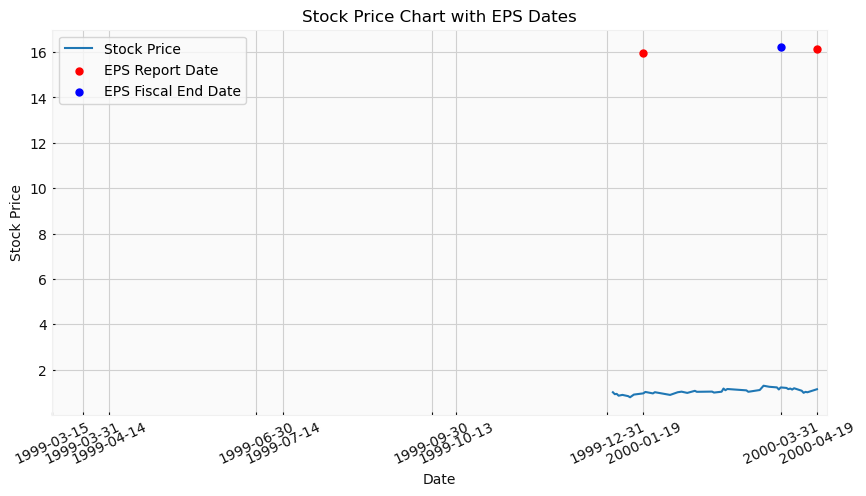

In [40]:
# Define an offset for the markers
offset = 15

# Plotting
plt.figure(figsize=(10, 5))
all_dates = pd.date_range(start, end, freq='D')
comp_stock.loc[:,'Date'] = pd.to_datetime(comp_stock['Date'])
comp_stock = comp_stock.set_index('Date').reindex(all_dates).reset_index().rename(columns={'index': 'Date'})
comp_stock['Open'] = comp_stock['Open'].interpolate(method='linear')
comp_stock['Close'] = comp_stock['Close'].interpolate(method='linear')
comp_stock['Date'] = comp_stock['Date'].dt.strftime('%Y-%m-%d')
plt.plot(comp_stock['Date'], comp_stock['Close'], label='Stock Price', zorder=5)  # Plot stock price

# Marking the EPS report date with "R"
eps_price = comp_stock.loc[comp_stock['Date'].isin(quarterly_eps_df['reportedDate']), 'Close']
eps_date = comp_stock.loc[comp_stock['Date'].isin(quarterly_eps_df['reportedDate']), 'Date']
plt.scatter(eps_date, eps_price + offset, color='red', marker='o', s=25, zorder=10, label='EPS Report Date')
# plt.text(eps_date, eps_price + offset, 'R', color='black', ha='center', va='center', fontsize=12, zorder=20)

# Marking the Fiscal End Date with "F"
fiscal_price = comp_stock.loc[comp_stock['Date'].isin(quarterly_eps_df['fiscalDateEnding']), 'Close']
fiscal_date = comp_stock.loc[comp_stock['Date'].isin(quarterly_eps_df['fiscalDateEnding']), 'Date']
plt.scatter(fiscal_date, fiscal_price + offset, color='blue', marker='o', s=25, zorder=10, label='EPS Fiscal End Date')
# plt.text(fiscal_date, fiscal_price + offset, 'F', color='black', ha='center', va='center', fontsize=12, zorder=20)

xticks = list(set([start, end] + eps_date.values.tolist() + fiscal_date.values.tolist()))
xlabels = list(set([start, end] + eps_date.values.tolist() + fiscal_date.values.tolist()))

plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(xticks, xlabels, rotation=25)
plt.tick_params(length=2, direction='in')
plt.title('Stock Price Chart with EPS Dates')
plt.grid(axis='y', linestyle='-', alpha=1)
plt.show()

/lab/mydcxiao/anaconda3/envs/bias/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


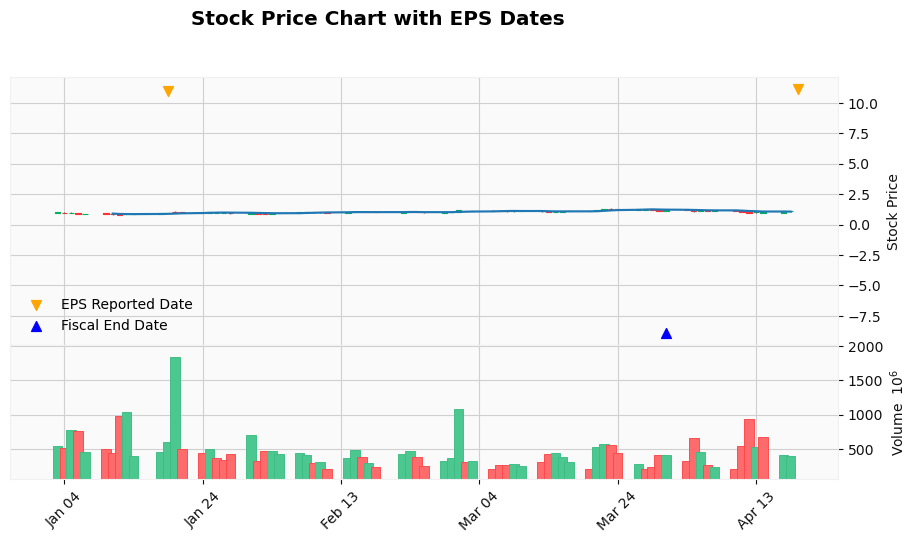

In [41]:
import mplfinance as mpf
import matplotlib.dates as mdates

ticker = 'AAPL'
comp_price = prices.xs(ticker, axis=1, level=1, drop_level=True)
comp_stock = comp_price.loc[start:end]
comp_stock.columns.name = None
comp_stock.reset_index(inplace=True)

# Converting 'Date' column to datetime if it's not already
comp_stock.loc[:, 'Date'] = pd.to_datetime(comp_stock['Date'])

# Setting the 'Date' column as the index
comp_stock.set_index('Date', inplace=True)

# Reindex to all_dates
# all_dates = pd.date_range(start, end, freq='D')
# comp_stock = comp_stock.reindex(all_dates)
# comp_stock.index.name = 'Date'

# Ensure quarterly_eps_df['reportedDate'] and quarterly_eps_df['fiscalDateEnding'] are in datetime format
quarterly_eps_df['reportedDate'] = pd.to_datetime(quarterly_eps_df['reportedDate'])
quarterly_eps_df['fiscalDateEnding'] = pd.to_datetime(quarterly_eps_df['fiscalDateEnding'])

# Creating markers for EPS report date and fiscal end date
eps_markers = quarterly_eps_df.loc[quarterly_eps_df['reportedDate'].between(start, end), 'reportedDate'].values
fiscal_markers = quarterly_eps_df.loc[quarterly_eps_df['fiscalDateEnding'].between(start, end), 'fiscalDateEnding'].values

# Creating EPS signals
offset = 10
all_dates = pd.date_range(start, end, freq='D')
low_prices = comp_stock['Low'].reindex(all_dates).interpolate(method='linear')
high_prices = comp_stock['High'].reindex(all_dates).interpolate(method='linear')
# eps_signal = np.where(high_prices.index.isin(eps_markers), high_prices + offset, np.nan)
# fiscal_signal = np.where(low_prices.index.isin(fiscal_markers), low_prices - offset, np.nan)
eps_signal = high_prices.loc[eps_markers] + offset
fiscal_signal = low_prices.loc[fiscal_markers] - offset

# Adding markers
# ap = [
#     mpf.make_addplot(eps_signal, type='scatter', markersize=20, marker='v', color='red'),
#     mpf.make_addplot(fiscal_signal, type='scatter', markersize=20, marker='^', color='blue')
# ]

# Plotting the candlestick chart
fig, axlist = mpf.plot(
    comp_stock, type='candle', mav=7, style='yahoo', 
    panel_ratios=(2,1), figratio=(2,1), figscale=1, 
    title='Stock Price Chart with EPS Dates', ylabel='Stock Price', 
    volume=True, show_nontrading=True, returnfig=True,
)

eps_x = [mdates.date2num(date) for date in eps_signal.index]
eps_y = [eps_signal[i] for i in eps_signal.index]
fiscal_x = [mdates.date2num(date) for date in fiscal_signal.index]
fiscal_y = [fiscal_signal[i] for i in fiscal_signal.index]

axlist[0].scatter(eps_x, eps_y, s=50, marker='v', color='orange', label='EPS Reported Date')
axlist[0].scatter(fiscal_x, fiscal_y, s=50, marker='^', color='blue', label='Fiscal End Date')
axlist[0].legend(frameon=False)